In [1]:
import pandas as pd
import numpy as np
from mstamp_stamp import mstamp
import matplotlib.pyplot as plt

In [10]:
data = pd.read_excel("data_akbilgic.xlsx")

/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [11]:
data

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
...,...,...,...,...,...,...,...,...,...,...
532,2011-02-16 00:00:00,0.008599,0.0134,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
533,2011-02-17 00:00:00,0.00931,0.015977,0.003071,-0.001186,0.000345,0.00262,0.001686,-0.000581,0.001039
534,2011-02-18 00:00:00,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
535,2011-02-21 00:00:00,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


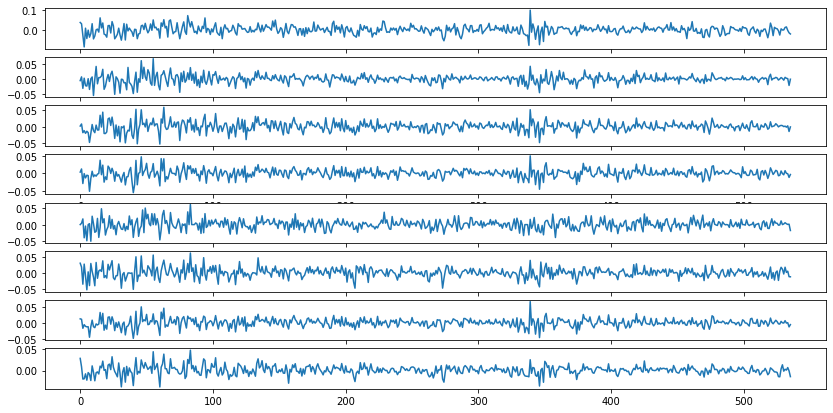

In [14]:
data_copy = data.drop(columns=["Unnamed: 0", "TL BASED"], index=[0])

multivariate_time_series = data_copy.to_numpy()
fig, axs =  plt.subplots(8, 1, figsize=(14,7))
for i in range(8):
    axs[i].plot(multivariate_time_series[:, i])
plt.show()

In [15]:
def RMSE(matprof_1, matprof_2):
    return np.sum(np.mean(np.square(matprof_1 - matprof_2)))

527
526

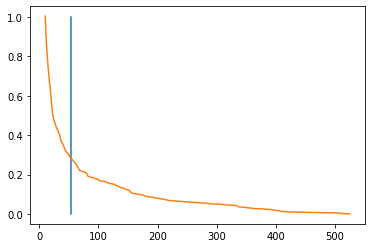

In [16]:
sub_len = 10
sub_num = multivariate_time_series.shape[0] - sub_len + 1
print(sub_num)

mat_pro_ref, pro_idx_ref = mstamp(multivariate_time_series.T, 10)
rmse = []
for i in range(1, sub_num):
    print("\r"+ str(i), end="")
    mat_pro_approx, pro_idx_approx = mstamp(multivariate_time_series.T, 10, i)
    rmse.append(RMSE(mat_pro_approx, mat_pro_ref))
    
d = np.linspace(0, 1, 100)
plt.plot([int(0.1*multivariate_time_series.shape[0]) for i in range(100)], d)
plt.plot(rmse)
plt.show()